## [作業重點]
目前你應該已經要很清楚資料集中，資料的型態是什麼樣子囉！包含特徵 (features) 與標籤 (labels)。因此要記得未來不管什麼專案，必須要把資料清理成相同的格式，才能送進模型訓練。
今天的作業開始踏入決策樹這個非常重要的模型，請務必確保你理解模型中每個超參數的意思，並試著調整看看，對最終預測結果的影響為何

## 作業

1. 試著調整 DecisionTreeClassifier(...) 中的參數，並觀察是否會改變結果？
2. 改用其他資料集 (boston, wine)，並與回歸模型的結果進行比較

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.datasets import load_boston, load_wine
import graphviz

# Decision Tree Classification (Wine)

In [3]:
wine = load_wine()

In [4]:
X = wine.data
y = wine.target

In [5]:
X.shape

(178, 13)

<font size=5>PCA</font>

In [6]:
X_pca = PCA(n_components=2).fit_transform(X)

In [7]:
X_pca.shape

(178, 2)

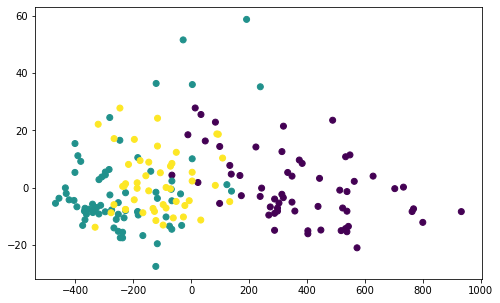

In [8]:
plt.figure(figsize=[8,5])
plt.scatter(X_pca[:,0], X_pca[:,1], c=y)

<font size=5>Decision Tree</font>

In [9]:
score = cross_val_score(DecisionTreeClassifier(random_state=1), X, y, cv=5).mean()
print(f'Cross validation score of wine_dataset: {score}')

Cross validation score of wine_dataset: 0.8713132460191284


max score: 0.8903818103818104, max_depth: 2


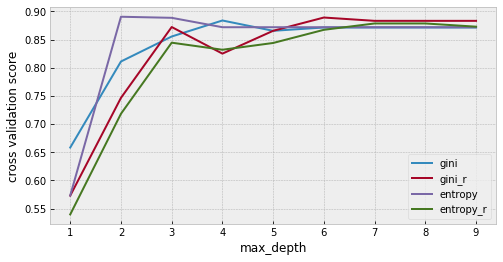

In [10]:
max_depth = range(1,10)
score_gini = []
score_gini_r = []
score_entropy = []
score_entropy_r = []
for i in max_depth:
    score_gini.append(cross_val_score(DecisionTreeClassifier(max_depth=i, random_state=1), X, y, cv=5).mean())
    score_gini_r.append(cross_val_score(DecisionTreeClassifier(splitter='random', max_depth=i, random_state=1), X, y, cv=5).mean())
    score_entropy.append(cross_val_score(DecisionTreeClassifier(criterion='entropy', max_depth=i, random_state=1), X, y, cv=5).mean())
    score_entropy_r.append(cross_val_score(DecisionTreeClassifier(criterion='entropy', splitter='random', max_depth=i, random_state=1), X, y, cv=5).mean())
    
plt.style.use('bmh')
plt.figure(figsize=[8,4])
plt.plot(range(1,10), score_gini, label='gini')
plt.plot(range(1,10), score_gini_r, label='gini_r')
plt.plot(range(1,10), score_entropy, label='entropy')
plt.plot(range(1,10), score_entropy_r, label='entropy_r')
plt.xlabel('max_depth')
plt.ylabel('cross validation score')
plt.legend(loc= 'best')

print(f'max score: {max(score_entropy)}, max_depth: {score_entropy.index(max(score_entropy))+1}')

In [11]:
DTC = DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=1).fit(X, y)
[*zip(wine.feature_names, DTC.feature_importances_)]

[('alcohol', 0.0),
 ('malic_acid', 0.0),
 ('ash', 0.0),
 ('alcalinity_of_ash', 0.0),
 ('magnesium', 0.0),
 ('total_phenols', 0.0),
 ('flavanoids', 0.4733015328628412),
 ('nonflavanoid_phenols', 0.0),
 ('proanthocyanins', 0.0),
 ('color_intensity', 0.1674532753051154),
 ('hue', 0.0),
 ('od280/od315_of_diluted_wines', 0.0),
 ('proline', 0.35924519183204345)]

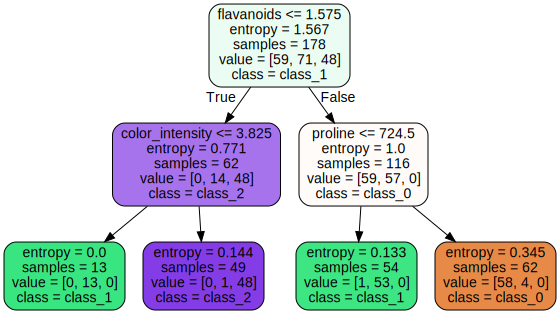

In [12]:
wine_data = export_graphviz(DTC, feature_names=wine.feature_names, class_names=wine.target_names, rounded=True, filled=True)
graph = graphviz.Source(wine_data)
graph

<font size=5>Linear model</font>

In [13]:
LGR = LogisticRegression(random_state=1, C=1)
score = cross_val_score(LGR, wine.data, wine.target, cv = 5).mean()
print(f'Cross validation score of wine_dataset: {score}')

Cross validation score of wine_dataset: 0.9615615615615616


# Decision Tree Regression (Boston)

In [14]:
boston = load_boston()

In [15]:
X= boston.data
y= boston.target

In [16]:
X.shape

(506, 13)

In [17]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=1)

In [18]:
DTR = DecisionTreeRegressor(random_state=1).fit(xtrain, ytrain)
print(f'r2 score: {DTR.score(xtest, ytest)}')

r2 score: 0.8415150668289263


<font size=5>Linear model</font>

In [19]:
LR = LinearRegression()
LR = LR.fit(xtrain, ytrain)
score = LR.score(xtest, ytest)
print(f'r2 score : {score}')

r2 score : 0.7836295385076281


    #本次結論:
    紅酒數據(分類): 線性羅輯斯回歸模型分類效果較決策樹好
    波士頓數據(回歸): 決策樹回歸結果較線性回歸模型好